In [1]:
# Importing Libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\palak\Downloads\Online Retail Data Set.csv", encoding="UTF-8")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [25]:
# Data Cleaning and Preparation

In [27]:
## Step1: Dataset Overview and Basic Exploration

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [7]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
df.shape

(541909, 8)

In [13]:
# Summary statistics for numerical variables

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [15]:
# Summary statistics for categorical variables

df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,31-10-2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [45]:
# Step2: Handling Missing Values

In [17]:
# Calculate the count of null-values for each column

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [19]:
res=round((df['CustomerID'].isnull().sum()*100)/len(df),2)
print("The percentage of missing values in the CustomerID column is :",res,"%")

The percentage of missing values in the CustomerID column is : 24.93 %


In [21]:
# Removing null-values from the 'CustomerID' column

df=df.dropna(subset=['CustomerID'])

In [23]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df.shape

(406829, 8)

In [71]:
# Step3: Handling duplicates

In [25]:
df.duplicated().sum()

5225

In [25]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01-12-2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01-12-2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,09-12-2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,09-12-2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,09-12-2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,09-12-2011 11:34,2.10,14446.0,United Kingdom


In [27]:
# Remove duplicates, keeping the first occurence

df=df.drop_duplicates().reset_index(drop=True)

In [29]:
df.shape

(401604, 8)

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [85]:
# Step4: Removing Cancelled Orders

In [33]:
# Count of rows for which quantity is less than 0
df[df['Quantity']<0].shape[0]

8872

In [35]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
401159,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
401243,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
401410,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
401411,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [37]:
# Store negative quantity rows in df_cancelled
# These will be required if we want to analyse the cancelled orders later-on
df_cancelled = df[df["Quantity"] < 0]

In [39]:
df_cancelled.shape

(8872, 8)

In [41]:
# Keep only rows with Quantity ≥ 0
df = df[df["Quantity"] >= 0]

In [23]:
# Checking the shape of the orginal dataframe
df.shape

(392732, 8)

In [11]:
# Step5: Further exploring the Columns

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,392732.0,13.153718,181.588420,1.0,2.00,6.00,12.00,80995.00
UnitPrice,392732.0,3.125596,22.240725,0.0,1.25,1.95,3.75,8142.75
CustomerID,392732.0,15287.734822,1713.567773,12346.0,13955.00,15150.00,16791.00,18287.00


In [45]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,392732,18536,576339,542
StockCode,392732,3665,85123A,2023
Description,392732,3877,WHITE HANGING HEART T-LIGHT HOLDER,2016
InvoiceDate,392732,17286,14-11-2011 15:27,542
Country,392732,37,United Kingdom,349227


In [17]:
# Exploring Quantity

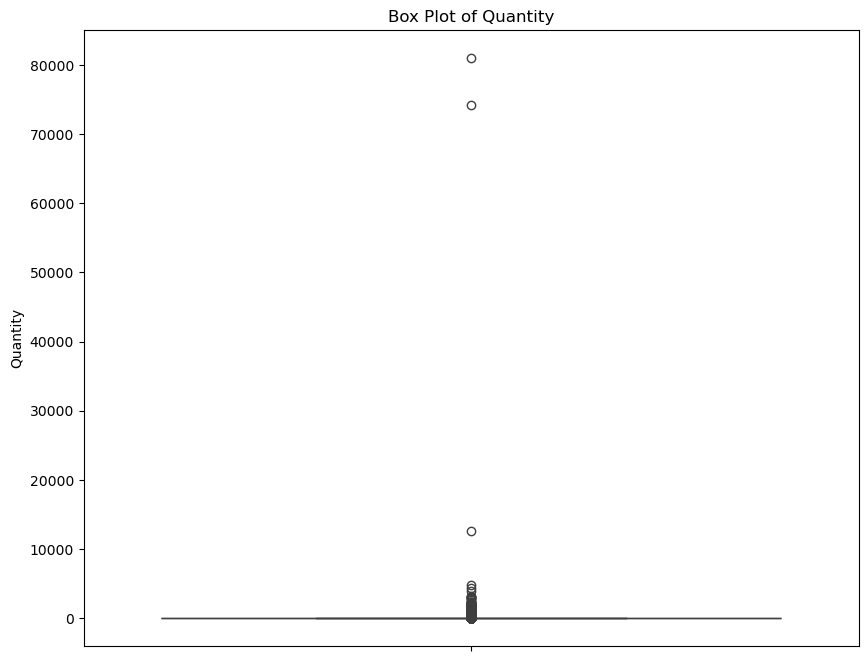

In [47]:
# Boxplot of quantity

plt.figure(figsize=(10,8))
y=df['Quantity']
sns.boxplot(y)
plt.title("Box Plot of Quantity")
plt.ylabel("Quantity")
plt.show()

In [49]:
# Checking the details of the order containing maximum quantity

df[df['Quantity']==80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
401131,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,09-12-2011 09:15,2.08,16446.0,United Kingdom


In [51]:
df[df['CustomerID']==16446.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
135450,553573,22980,PANTRY SCRUBBING BRUSH,1,18-05-2011 09:52,1.65,16446.0,United Kingdom
135451,553573,22982,PANTRY PASTRY BRUSH,1,18-05-2011 09:52,1.25,16446.0,United Kingdom
401131,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,09-12-2011 09:15,2.08,16446.0,United Kingdom


In [51]:
df2=df[df['Quantity']<50]
df2.shape

(380234, 8)

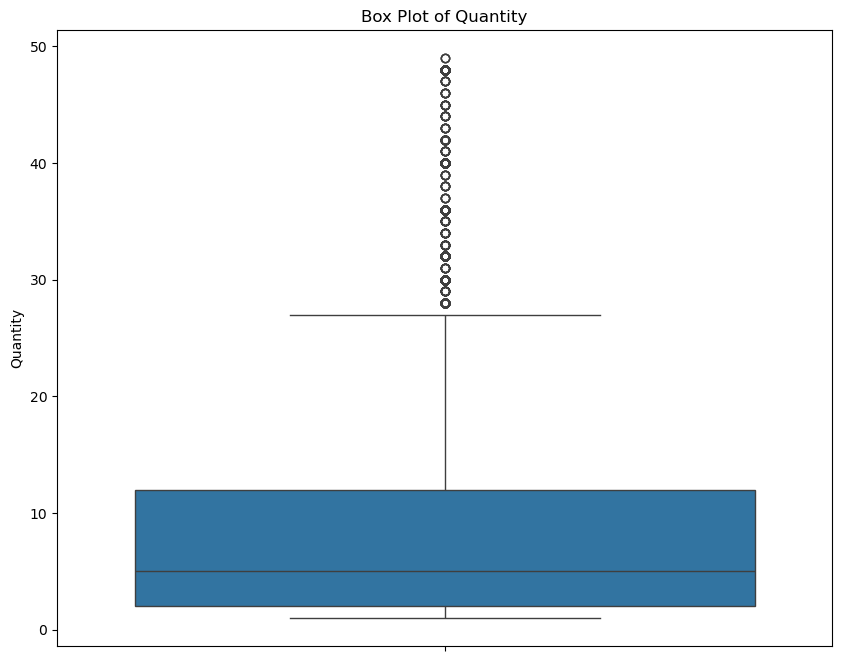

In [53]:
# Boxplot after excluding outliers
plt.figure(figsize=(10,8))
sns.boxplot(y=df2['Quantity'])
plt.title("Box Plot of Quantity")
plt.ylabel("Quantity")
plt.show()

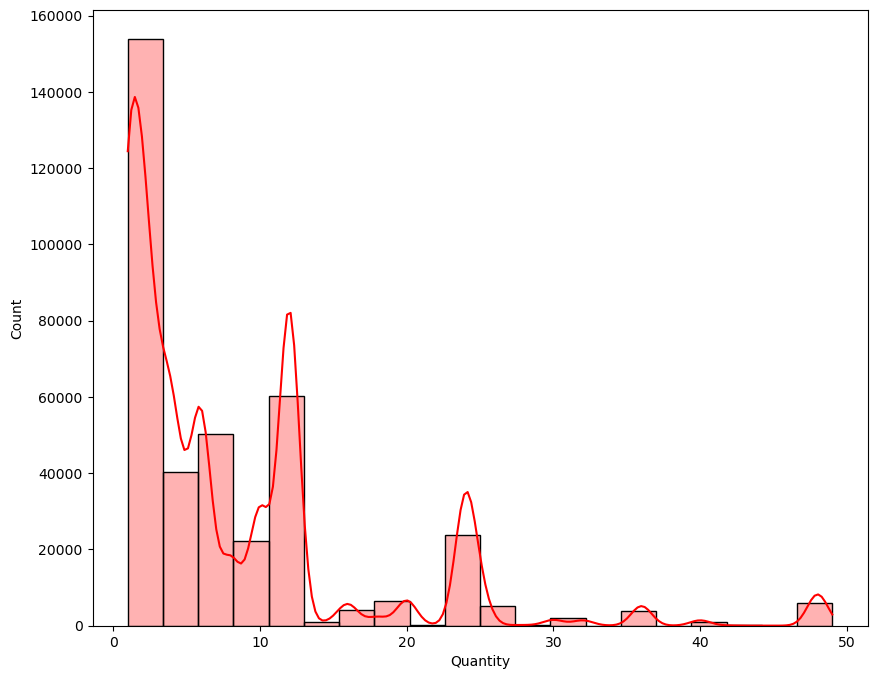

In [55]:
# Histplot for checking the distribution
plt.figure(figsize=(10,8))
# plt.hist(df2["Quantity"],bins=20,color='red',alpha=0.3)
sns.histplot(df2["Quantity"],bins=20,color='red',alpha=0.3,kde=True)
plt.show()

In [77]:
# Exploring Unit Price

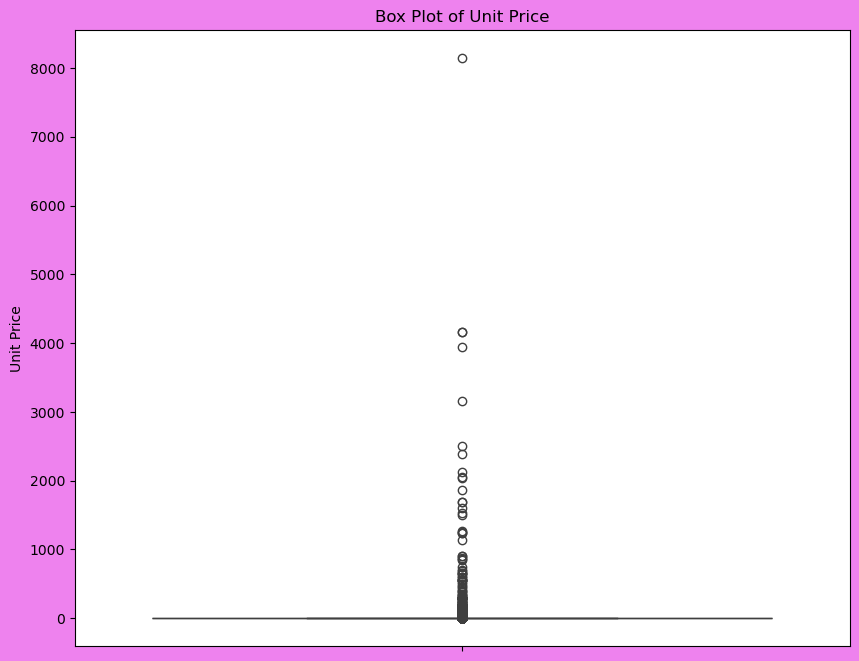

In [57]:
plt.figure(figsize=(10,8),facecolor='violet',alpha=0.3)
sns.boxplot(df["UnitPrice"])
plt.title("Box Plot of Unit Price")
plt.ylabel("Unit Price")
plt.show()

In [59]:
# Checking the max value of UnitPrice
df[df['UnitPrice']==8142.75]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
119907,551697,POST,POSTAGE,1,03-05-2011 13:46,8142.75,16029.0,United Kingdom


In [61]:
df3=df[df['UnitPrice']<10]
df3.shape

(381920, 8)

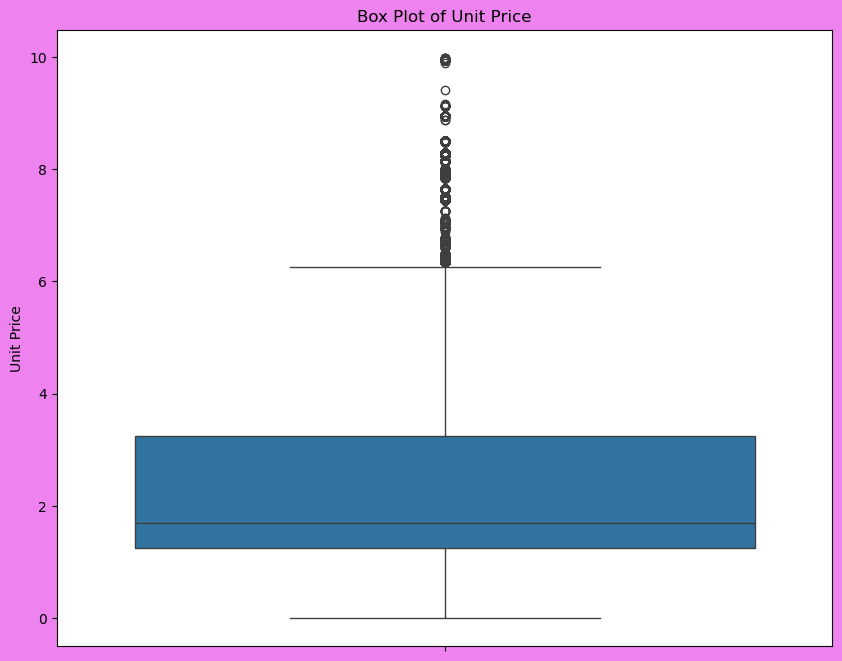

In [63]:
plt.figure(figsize=(10,8),facecolor='violet')
sns.boxplot(df3["UnitPrice"])
plt.title("Box Plot of Unit Price")
plt.ylabel("Unit Price")
plt.show()

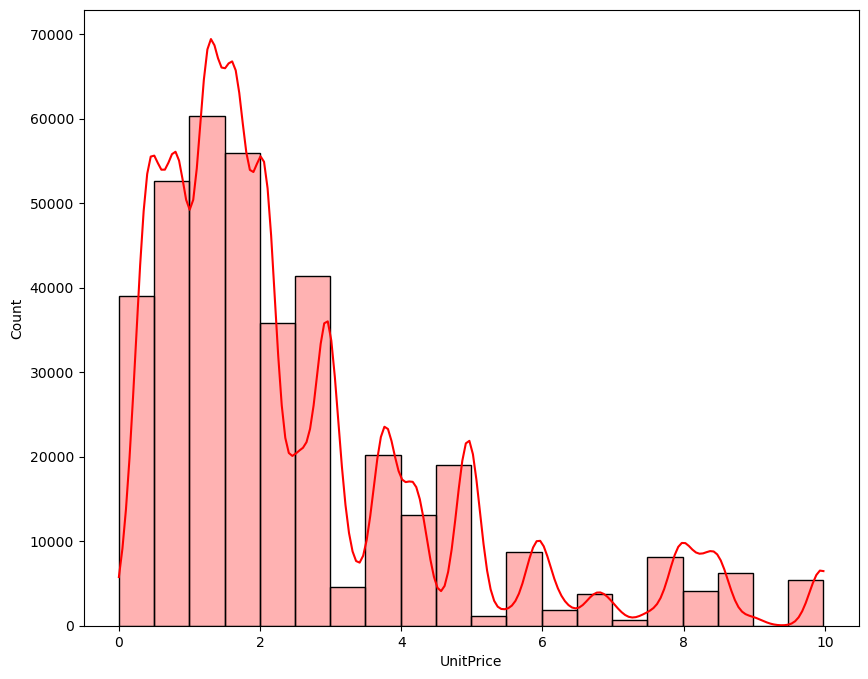

In [65]:
plt.figure(figsize=(10,8))
sns.histplot(df3["UnitPrice"],bins=20,color='red',alpha=0.3,kde=True)
plt.show()

In [101]:
# Exploring InvoiceDate

In [67]:
print(df['InvoiceDate'].dtype)

object


In [69]:
# Changing the InvoiceDate datatype to datetime

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],dayfirst=True)
print(df['InvoiceDate'].dtype)

datetime64[ns]


In [71]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
401599   2011-12-09 12:50:00
401600   2011-12-09 12:50:00
401601   2011-12-09 12:50:00
401602   2011-12-09 12:50:00
401603   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392732, dtype: datetime64[ns]

In [73]:
# First and Last order date
print("First Order Date : ",df['InvoiceDate'].min())
print("Last Order Date : ",df['InvoiceDate'].max())

First Order Date :  2010-12-01 08:26:00
Last Order Date :  2011-12-09 12:50:00


In [117]:
# Exploring StockCode

In [75]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [77]:
print(df['StockCode'].dtype)

object


In [79]:
df['StockCode']=df['StockCode'].astype(str)
df[df['StockCode'].str.isnumeric()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [45]:
df.shape

(392732, 8)

In [81]:
# Filter for StockCodes that are entirely numeric
numeric_stockcodes=df[df['StockCode'].str.isnumeric()]

# Calculate the length of each numeric StockCode
numeric_stockcodes['length']=numeric_stockcodes['StockCode'].str.len()

# Group by the length and count the occurrences
length_counts=numeric_stockcodes['length'].value_counts().sort_index()

print(length_counts)

length
5    358309
Name: count, dtype: int64


In [83]:
df[~df['StockCode'].str.isnumeric()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
...,...,...,...,...,...,...,...,...
401473,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany
401504,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
401533,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
401539,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


In [85]:
# Filter for StockCodes that are entirely numeric
alphanumeric_stockcodes = df[~df['StockCode'].str.isnumeric()]

# Calculate the length of each numeric StockCode
alphanumeric_stockcodes['Length'] = alphanumeric_stockcodes['StockCode'].str.len()

# Group by the length and count the occurrences
length__counts = alphanumeric_stockcodes['Length'].value_counts().sort_index()

# View the result
print(length__counts)

Length
1       285
2       133
3        16
4      1103
6     32583
7       291
12       12
Name: count, dtype: int64


In [87]:
alphanumeric_stockcodes.shape

(34423, 9)

In [89]:
# Creating a new column which contains the length of the StockCodes
df["len_sc"] = df["StockCode"].str.len()
df["len_sc"].value_counts()

len_sc
5     358309
6      32583
4       1103
7        291
1        285
2        133
3         16
12        12
Name: count, dtype: int64

In [91]:
# StockCodes which have a length less than 5
df[(df["len_sc"] < 5)]["StockCode"].value_counts()

StockCode
POST    1099
M        285
C2       133
DOT       16
PADS       4
Name: count, dtype: int64

In [93]:
df_sc = df[(df["len_sc"] < 5)][["StockCode", "Description"]].drop_duplicates()
df_sc

,StockCode,Description
45,POST,POSTAGE
1386,C2,CARRIAGE
1654,M,Manual
108733,PADS,PADS TO MATCH ALL CUSHIONS
228469,DOT,DOTCOM POSTAGE


In [95]:
df[df["StockCode"] == 'PADS']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,len_sc
108733,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,4
197044,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,4
259711,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.000,16133.0,United Kingdom,4
260900,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,4


In [97]:
df[(df["len_sc"] > 7)]["StockCode"].value_counts()

StockCode
BANK CHARGES    12
Name: count, dtype: int64

In [99]:
df[(df["len_sc"] == 7)]["StockCode"].value_counts()

StockCode
15056BL    291
Name: count, dtype: int64

In [101]:
df[df["StockCode"] == '15056BL'].head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,len_sc
132,536381,15056BL,EDWARDIAN PARASOL BLACK,2,2010-12-01 09:41:00,5.95,15311.0,United Kingdom,7


In [103]:
# Removing all the anomaly stockcodes i.e. stock codes of length 1,2,4,12 
# Keeping only the stockcodes having length 5,6,7
df = df[(df["len_sc"] >= 5) & (df["len_sc"] < 8)]
df["len_sc"].value_counts()

len_sc
5    358309
6     32583
7       291
Name: count, dtype: int64

In [105]:
df.shape

(391183, 9)

In [107]:
# Removing the len_sc column
df = df.drop("len_sc", axis=1)
df.shape

(391183, 8)

In [75]:
# Exploring Description

In [109]:
df[["StockCode", "Description"]].describe()

,StockCode,Description
count,391183,391183
unique,3659,3871
top,85123A,WHITE HANGING HEART T-LIGHT HOLDER
freq,2023,2016


In [111]:
# Identify stock codes with more than one unique description
duplicates = df.groupby('StockCode')['Description'].nunique()
duplicates = duplicates[duplicates > 1].index

# Filter the rows that have these stock codes
duplicate_rows = df[df['StockCode'].isin(duplicates)]

# Sort the result by StockCode
duplicate_rows_sorted = duplicate_rows[['StockCode', 'Description']].sort_values(by='StockCode')

# View the result
print(duplicate_rows_sorted.drop_duplicates())


       StockCode                          Description
70712     16156L                       WRAP, CAROUSEL
196026    16156L                        WRAP CAROUSEL
134524    17107D  FLOWER FAIRY,5 SUMMER B'DRAW LINERS
360341    17107D         FLOWER FAIRY 5 DRAWER LINERS
251446    17107D    FLOWER FAIRY 5 SUMMER DRAW LINERS
...          ...                                  ...
332361    90014A         SILVER M.O.P. ORBIT NECKLACE
134637    90014B         GOLD M PEARL  ORBIT NECKLACE
283326    90014B           GOLD M.O.P. ORBIT NECKLACE
218418    90014C          SILVER/BLACK ORBIT NECKLACE
376110    90014C      SILVER AND BLACK ORBIT NECKLACE

[445 rows x 2 columns]


Insights: The descriptions are basically same but there are some data entry errors. In some cases, multiple descriptions
of a specific product are different because of an extra comma or space or a new word. We can choose to ignore this situation 
as we will use StockCodes for product analysis. 

In [82]:
# Exploring CustomerID

In [113]:
df["CustomerID"].nunique()

4335

In [115]:
df["CustomerID"].value_counts().head()

CustomerID
17841.0    7667
14911.0    5586
14096.0    5095
12748.0    4397
14606.0    2674
Name: count, dtype: int64

In [88]:
# Exploring Country

In [117]:
df["Country"].nunique()

37

In [119]:
df["Country"].value_counts().head(37)

Country
United Kingdom          348892
Germany                   8644
France                    8019
EIRE                      7128
Spain                     2418
Netherlands               2326
Belgium                   1935
Switzerland               1811
Portugal                  1416
Australia                 1183
Norway                    1049
Channel Islands            743
Italy                      741
Finland                    647
Cyprus                     601
Sweden                     427
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     245
Unspecified                241
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57
Lebanon                     45


In [94]:
# Exploring InvoiceNo

In [121]:
df["InvoiceNo"].nunique()

18405

In [123]:
df["InvoiceNo"].value_counts().head(5)

InvoiceNo
576339    541
579196    532
580727    528
578270    441
573576    434
Name: count, dtype: int64

In [125]:
df.shape

(391183, 8)

In [104]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [106]:
df.shape

(391183, 8)

In [127]:
# Creating a new column "Total Sales"
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [129]:
df["TotalSales"].describe()

count    391183.000000
mean         22.335397
std         310.919394
min           0.000000
25%           4.950000
50%          11.900000
75%          19.800000
max      168469.600000
Name: TotalSales, dtype: float64

In [131]:
# We will use this dataframe for the rest of time-series analysis
dft = df.copy()
dft.shape

(391183, 9)

In [133]:
# Analysing Daily sales 
# Extract the date from the datetime
dft["InvoiceDate"] = dft["InvoiceDate"].dt.date
dft.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [135]:
daily_sales = dft.groupby("InvoiceDate")["TotalSales"].sum().reset_index()
daily_sales.head()

,InvoiceDate,TotalSales
0,2010-12-01,46035.29
1,2010-12-02,47164.57
2,2010-12-03,23530.93
3,2010-12-05,30905.32
4,2010-12-06,30807.90


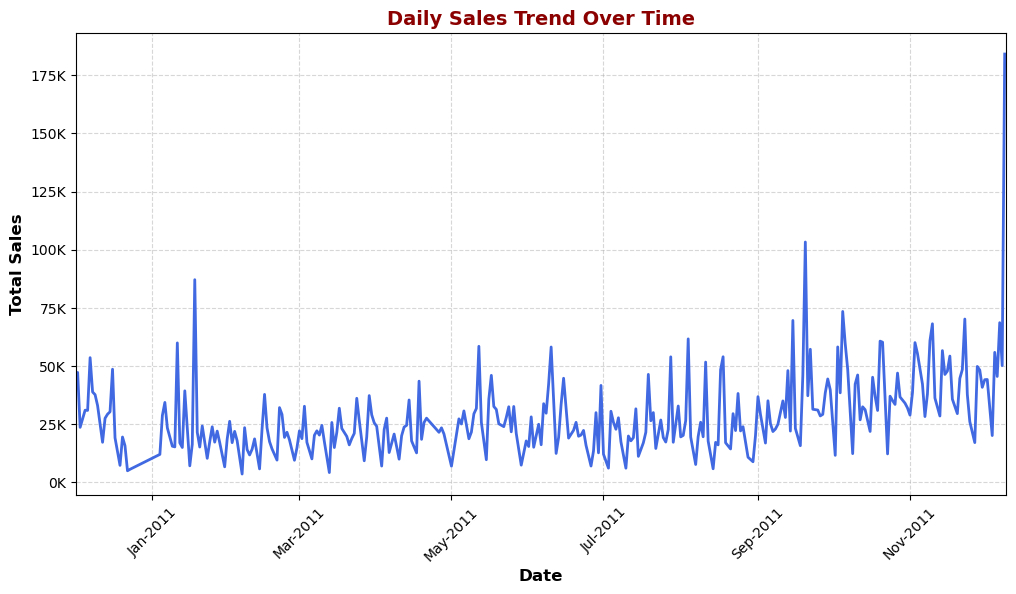

In [140]:
# Set figure size
plt.figure(figsize=(12, 6))

# Line plot
sns.lineplot(data=daily_sales, x="InvoiceDate", y="TotalSales", color="royalblue", linewidth=2)

# Labels & Title
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Total Sales", fontsize=12, fontweight="bold")
plt.title("Daily Sales Trend Over Time", fontsize=14, fontweight="bold", color="darkred")

# Format x-axis to show Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # Jan-2010 format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2nd month

# Format y-axis to show sales in "K" instead of full numbers
plt.gca().yaxis.set_major_formatter(mticks.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))  # Converts 80,000 → 80K

# Set x-axis limits to start from the first date in the dataset
plt.xlim(df["InvoiceDate"].min(), df["InvoiceDate"].max())

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


In [142]:
# Resample sales data monthly and sum up the total sales
monthly_sales = df.resample('M', on="InvoiceDate")["TotalSales"].sum()

# Convert index to formatted string (e.g., "Jan 2010")
monthly_sales.index = monthly_sales.index.strftime('%b %Y')

# Display the result
print(monthly_sales)

InvoiceDate
Dec 2010     565199.56
Jan 2011     562682.91
Feb 2011     442293.59
Mar 2011     583143.85
Apr 2011     454440.88
May 2011     659242.49
Jun 2011     653264.92
Jul 2011     591603.79
Aug 2011     635514.38
Sep 2011     938752.63
Oct 2011    1002326.56
Nov 2011    1136534.00
Dec 2011     512228.08
Name: TotalSales, dtype: float64


In [144]:
print("The Average monthly sales over a period of one year is", round(monthly_sales.values.mean()))

The Average monthly sales over a period of one year is 672094


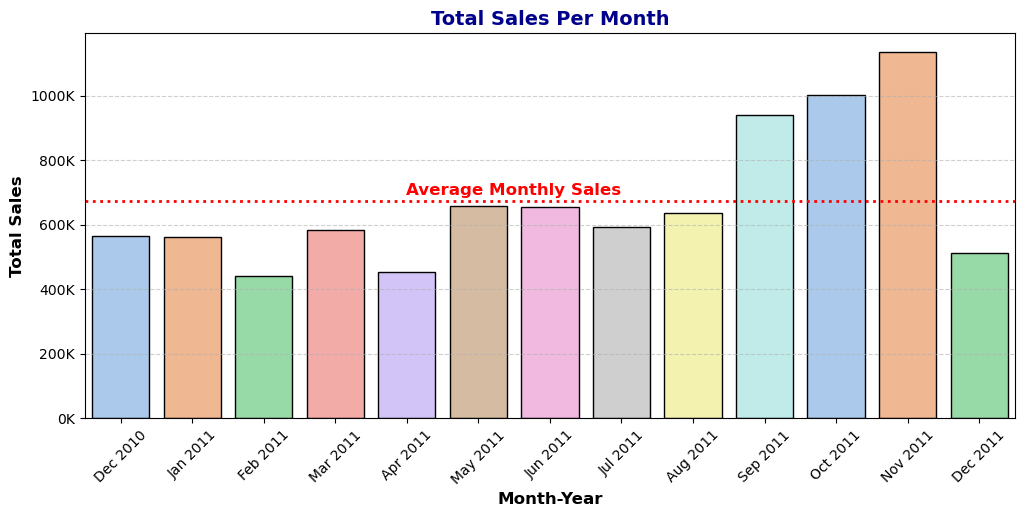

In [146]:
plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="pastel", edgecolor="black")

# Formatting
plt.xlabel("Month-Year", fontsize=12, fontweight="bold")
plt.ylabel("Total Sales", fontsize=12, fontweight="bold")
plt.title("Total Sales Per Month", fontsize=14, fontweight="bold", color="darkblue")

# Format y-axis to show sales in "K" instead of full numbers
plt.gca().yaxis.set_major_formatter(mticks.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

# Calculate average monthly sales
average_sales = monthly_sales.values.mean()
# Add a horizontal dotted line for average sales
plt.axhline(average_sales, color="red", linestyle="dotted", linewidth=2, label=f"Avg Sales: {average_sales/1000:.1f}K")


# Add annotation above the average line
plt.text(x=len(monthly_sales) - 6,  # Position near the last bar
         y=average_sales + (average_sales * 0.03),  # Slightly above the line
         s="Average Monthly Sales",
         color="red",
         fontsize=12,
         fontweight="bold",
         ha="right")  # Align to the right

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [148]:
# Analysing Daily sales 
# Extract the date from the datetime
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday


In [150]:
sales_by_day = df.groupby("DayOfWeek")["TotalSales"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
sales_by_day

DayOfWeek
Monday       1326500.48
Tuesday      1672493.12
Wednesday    1559469.25
Thursday     1939228.91
Friday       1459797.08
Saturday            NaN
Sunday        779738.80
Name: TotalSales, dtype: float64

In [152]:
df[df["DayOfWeek"] == "Saturday"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek


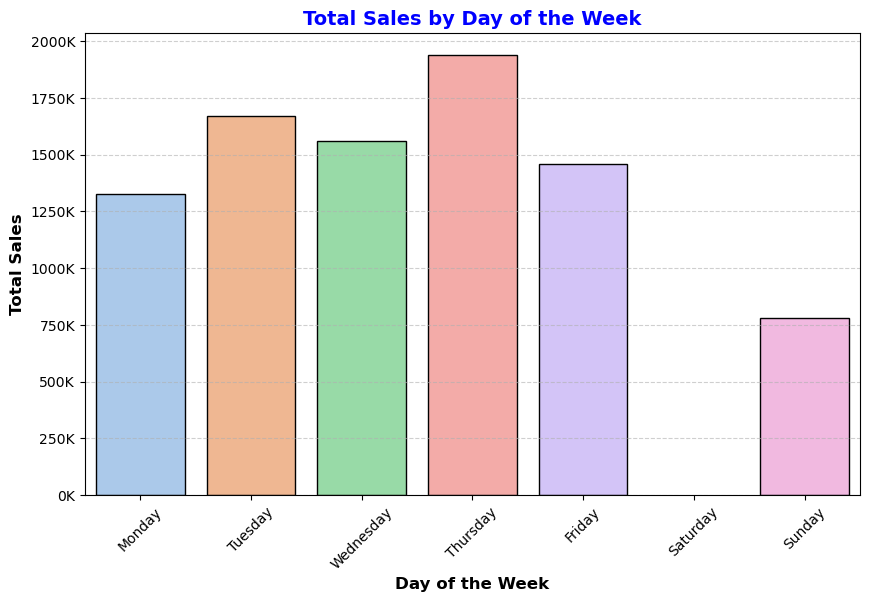

In [156]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="pastel", edgecolor="black")

# Formatting
plt.xlabel("Day of the Week", fontsize=12, fontweight="bold")
plt.ylabel("Total Sales", fontsize=12, fontweight="bold")
plt.title("Total Sales by Day of the Week", fontsize=14, fontweight="bold", color="blue")

# Format y-axis to show sales in "K" instead of full numbers
plt.gca().yaxis.set_major_formatter(mticks.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()

In [158]:
df["StockCode"].nunique()

3659

In [160]:
df["CustomerID"].nunique()

4335

In [162]:
# Total sales per customer
sales_per_customer = df.groupby("CustomerID")["TotalSales"].sum().reset_index()
sales_per_customer = sales_per_customer.sort_values(by = "TotalSales", ascending=False).reset_index(drop=True)
sales_per_customer

,CustomerID,TotalSales
0,14646.0,279138.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,136161.83
...,...,...
4330,17956.0,12.75
4331,14792.0,6.20
4332,16454.0,5.90
4333,16738.0,3.75


In [167]:
# Creating a new column "Cumulative Percentage"
sales_per_customer["CumulativePercentage"] = (sales_per_customer["TotalSales"].cumsum()*100)/sales_per_customer["TotalSales"].sum()
sales_per_customer

,CustomerID,TotalSales,CumulativePercentage
0,14646.0,279138.02,3.194812
1,18102.0,259657.30,6.166662
2,17450.0,194390.79,8.391519
3,16446.0,168472.50,10.319734
4,14911.0,136161.83,11.878144
...,...,...,...
4330,17956.0,12.75,99.999819
4331,14792.0,6.20,99.999890
4332,16454.0,5.90,99.999957
4333,16738.0,3.75,100.000000


In [169]:
# Verifying the Pareto Principle
perc = round((len(sales_per_customer[sales_per_customer["CumulativePercentage"] < 80])*100)/len(sales_per_customer))
print(f"{perc}% of customers contribute to 80% of sales.")

26% of customers contribute to 80% of sales.


In [171]:
df["StockCode"].nunique()

3659

In [173]:
# Total sales per product
sales_per_product = df.groupby("StockCode")["TotalSales"].sum().reset_index()
sales_per_product = sales_per_product.sort_values(by="TotalSales", ascending=False).reset_index(drop=True)
sales_per_product

,StockCode,TotalSales
0,23843,168469.60
1,22423,142264.75
2,85123A,100547.45
3,85099B,85040.54
4,23166,81416.73
...,...,...
3654,84201C,0.95
3655,90104,0.85
3656,90084,0.85
3657,21268,0.84


In [175]:
# Creating a new column "CumulativePercentage"
sales_per_product["CumulativePercentage"] = (sales_per_product["TotalSales"].cumsum()*100)/sales_per_product["TotalSales"].sum()
sales_per_product

,StockCode,TotalSales,CumulativePercentage
0,23843,168469.60,1.928181
1,22423,142264.75,3.556441
2,85123A,100547.45,4.707235
3,85099B,85040.54,5.680547
4,23166,81416.73,6.612384
...,...,...,...
3654,84201C,0.95,99.999966
3655,90104,0.85,99.999976
3656,90084,0.85,99.999986
3657,21268,0.84,99.999995


In [179]:
# Verifying the Pareto Principle
perc = round((len(sales_per_product[sales_per_product["CumulativePercentage"] < 80])*100)/len(sales_per_product))
print(f"{perc}% of products contribute to 80% of sales.")

21% of products contribute to 80% of sales.


In [177]:
# Sales volume per product
volume_per_product = df.groupby("StockCode")["Quantity"].sum().reset_index()
volume_per_product = volume_per_product.sort_values(by="Quantity", ascending=False).reset_index(drop=True)
volume_per_product

,StockCode,Quantity
0,23843,80995
1,23166,77916
2,84077,54319
3,22197,49160
4,85099B,46078
...,...,...
3654,84569C,1
3655,90025F,1
3656,90130A,1
3657,21414,1


In [181]:
# Creating a new column "CumulativePercentage"
volume_per_product["CumulativePercentage"] = (volume_per_product["Quantity"].cumsum()*100)/volume_per_product["Quantity"].sum()
volume_per_product

,StockCode,Quantity,CumulativePercentage
0,23843,80995,1.570992
1,23166,77916,3.082262
2,84077,54319,4.135842
3,22197,49160,5.089357
4,85099B,46078,5.983093
...,...,...,...
3654,84569C,1,99.999922
3655,90025F,1,99.999942
3656,90130A,1,99.999961
3657,21414,1,99.999981


In [183]:
# Verifying the Pareto Principle
perc = round((len(volume_per_product[volume_per_product["CumulativePercentage"] < 80])*100)/len(volume_per_product))
print(f"{perc}% of products contribute to 80% of sales volume.")

23% of products contribute to 80% of sales volume.


# RFM Analysis

## Create RFM Table

In [185]:
# Latest date in the dataset (for Recency calculation)
latest_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
print(latest_date)

2011-12-10 12:50:00


In [187]:
# Group by CustomerID and calculate RFM metrics
rfm_df = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (latest_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",  # Frequency
    "TotalSales": "sum"  # Monetary
}).reset_index()

# Rename columns
rfm_df.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

# Display the top rows
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1437.24
3,12349.0,19,1,1457.55
4,12350.0,310,1,294.40


In [189]:
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,4335.000000,4335.000000,4335.000000,4335.000000
mean,15298.780392,92.684890,4.245675,2015.508106
std,1722.075082,100.172622,7.636337,8902.699230
min,12346.000000,1.000000,1.000000,0.000000
25%,13811.500000,18.000000,1.000000,304.105000
50%,15297.000000,51.000000,2.000000,661.520000
75%,16778.500000,143.000000,5.000000,1631.475000
max,18287.000000,374.000000,206.000000,279138.020000


## Assign RFM Scores

In [191]:
# Rank-based Frequency scoring
rfm_df["F_Rank"] = rfm_df["Frequency"].rank(method="first")

# Get bin edges for Recency, Frequency (ranked), and Monetary
_, recency_bins = pd.qcut(rfm_df["Recency"], q=5, labels=[5, 4, 3, 2, 1], retbins=True)
_, frequency_bins = pd.qcut(rfm_df["F_Rank"], q=5, labels=[1, 2, 3, 4, 5], retbins=True)
_, monetary_bins = pd.qcut(rfm_df["Monetary"], q=5, labels=[1, 2, 3, 4, 5], retbins=True)

# Convert frequency rank bins to actual frequency values
actual_freq_bins = []
for i in range(len(frequency_bins) - 1):
    lower_rank = frequency_bins[i]
    upper_rank = frequency_bins[i + 1]
    actual_lower = rfm_df.loc[rfm_df["F_Rank"] >= lower_rank, "Frequency"].min()
    actual_upper = rfm_df.loc[rfm_df["F_Rank"] <= upper_rank, "Frequency"].max()
    actual_freq_bins.append(f"{actual_lower} - {actual_upper}")

# Create a DataFrame with readable bin ranges
rfm_bin_ranges1 = pd.DataFrame({
    "Score": [1,2,3,4,5],
    "Frequency Range (Mapped)": actual_freq_bins,
    "Monetary Range": [f"{int(monetary_bins[i])} - {int(monetary_bins[i+1])}" for i in range(len(monetary_bins)-1)]
})
rfm_bin_ranges2 = pd.DataFrame({
    "Score": [5,4,3,2,1],
    "Recency Range": [f"{int(recency_bins[i])} - {int(recency_bins[i+1])}" for i in range(len(recency_bins)-1)]
})

# Display bin ranges
print(rfm_bin_ranges1)
print(rfm_bin_ranges2)

   Score Frequency Range (Mapped) Monetary Range
0      1                    1 - 1        0 - 246
1      2                    1 - 2      246 - 482
2      3                    2 - 3      482 - 922
3      4                    3 - 5     922 - 2028
4      5                  5 - 206  2028 - 279138
   Score Recency Range
0      5        1 - 14
1      4       14 - 33
2      3       33 - 72
3      2      72 - 179
4      1     179 - 374


In [193]:
# Recency Score (lower is better, so reverse the labels)
rfm_df["R_Score"] = pd.qcut(rfm_df["Recency"], q=5, labels=[5, 4, 3, 2, 1])

# Frequency Score (higher is better)
rfm_df["F_Score"] = pd.qcut(rfm_df["Frequency"].rank(method="first"), q=5, labels=[1, 2, 3, 4, 5])

# Monetary Score (higher is better)
rfm_df["M_Score"] = pd.qcut(rfm_df["Monetary"], q=5, labels=[1, 2, 3, 4, 5])

rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,F_Rank,R_Score,F_Score,M_Score
0,12346.0,326,1,77183.60,1.0,1,1,5
1,12347.0,2,7,4310.00,3644.0,5,5,5
2,12348.0,75,4,1437.24,2840.0,2,4,4
3,12349.0,19,1,1457.55,2.0,4,1,4
4,12350.0,310,1,294.40,3.0,1,1,2


## Segment Customers based on RFM Scores

In [195]:
rfm_df["R_Score"] = rfm_df["R_Score"].astype(int)
rfm_df["F_Score"] = rfm_df["F_Score"].astype(int)
rfm_df["M_Score"] = rfm_df["M_Score"].astype(int)

In [197]:
def rfm_segment(row):
    if row["R_Score"] == 5 and row["F_Score"] == 5: 
        return "High Value"   
    if row["R_Score"] >= 4 and row["F_Score"] >= 4: 
        return "Loyal"
    elif row["R_Score"] >= 2 or row["F_Score"] >= 2: 
        return "At-Risk"
    else:
        return "Dormant"

rfm_df["Segment"] = rfm_df.apply(rfm_segment, axis=1)

In [185]:
rfm_df["Segment"].value_counts()

Segment
At-Risk       2837
Loyal          693
High Value     443
Dormant        362
Name: count, dtype: int64

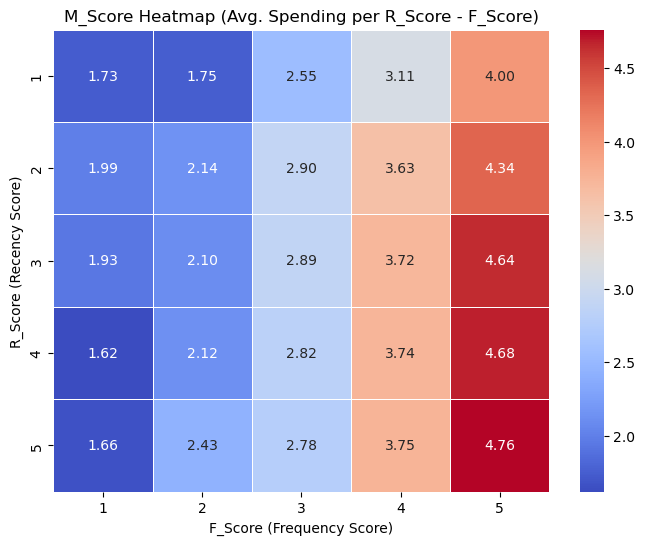

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming rfm_df is already loaded
rfm_pivot = rfm_df.pivot_table(index='R_Score', columns='F_Score', values='M_Score', aggfunc='mean', fill_value=0)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(rfm_pivot, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Labels and title
plt.title("M_Score Heatmap (Avg. Spending per R_Score - F_Score)")
plt.xlabel("F_Score (Frequency Score)")
plt.ylabel("R_Score (Recency Score)")

# Save with transparency & high resolution
plt.savefig("graph.png", dpi=300, bbox_inches="tight", transparent=True)

plt.show()



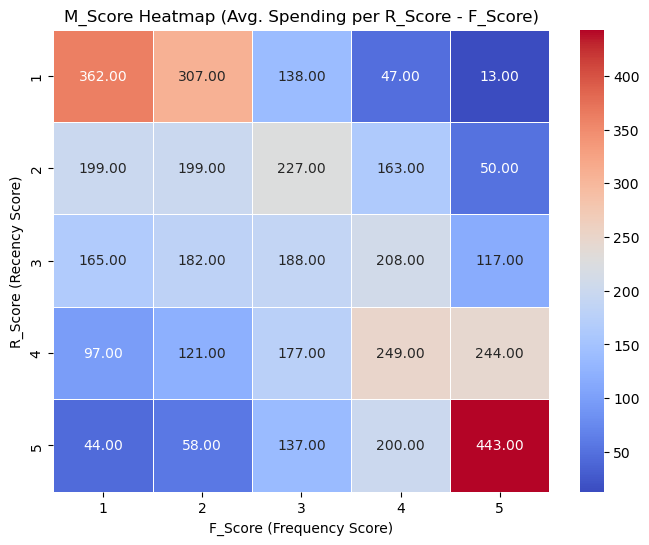

In [201]:
# Assuming rfm_df is already loaded
rfm_pivot = rfm_df.pivot_table(index='R_Score', columns='F_Score', values='M_Score', aggfunc='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(rfm_pivot, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Labels and title
plt.title("M_Score Heatmap (Avg. Spending per R_Score - F_Score)")
plt.xlabel("F_Score (Frequency Score)")
plt.ylabel("R_Score (Recency Score)")
plt.show()

In [203]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,F_Rank,R_Score,F_Score,M_Score,Segment
0,12346.0,326,1,77183.60,1.0,1,1,5,Dormant
1,12347.0,2,7,4310.00,3644.0,5,5,5,High Value
2,12348.0,75,4,1437.24,2840.0,2,4,4,At-Risk
3,12349.0,19,1,1457.55,2.0,4,1,4,At-Risk
4,12350.0,310,1,294.40,3.0,1,1,2,Dormant
...,...,...,...,...,...,...,...,...,...
4330,18280.0,278,1,180.60,1505.0,1,2,1,At-Risk
4331,18281.0,181,1,80.82,1506.0,1,2,1,At-Risk
4332,18282.0,8,2,178.05,2337.0,5,3,1,At-Risk
4333,18283.0,4,16,2039.58,4184.0,5,5,5,High Value


## Exporting file 

In [205]:
rfm_df.shape

(4335, 9)

In [207]:
rfm_df.to_csv("rfm_data.csv", index=False)

In [209]:
rfm_df.to_csv("rfm_new_data.csv", index=False)

In [211]:
df.shape

(391183, 10)

In [213]:
df.to_csv("df_cleaned.csv", index=False)

## Some New Calculations

In [215]:
df_new = df.copy()
df_new.shape

(391183, 10)

In [217]:
df_new.shape

(391183, 10)

In [223]:
# import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

# Convert InvoiceDate to datetime format
df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'])

# Extract Year-Month for analysis
df_new['PurchaseMonth'] = df_new['InvoiceDate'].dt.to_period('M')

# Get the first purchase month per customer
first_purchase = df_new.groupby('CustomerID')['PurchaseMonth'].min().reset_index()
first_purchase.rename(columns={'PurchaseMonth': 'FirstPurchaseMonth'}, inplace=True)

# Merge first purchase month with the original dataset
df_new = df_new.merge(first_purchase, on='CustomerID', how='left')

# Define churn threshold (e.g., 90 days of inactivity)
churn_threshold = 90

# Corrected function
def customer_type(row):
    if row['PurchaseMonth'] == row['FirstPurchaseMonth']:
        return 'New Customer'
    elif (df_new['InvoiceDate'].max() - row['InvoiceDate']).days > churn_threshold:
        return 'Churned Customer'
    else:
        return 'Returning Customer'

# Apply function
df_new['CustomerType'] = df_new.apply(customer_type, axis=1)

# Display sample data
df_new[['CustomerID', 'InvoiceDate', 'PurchaseMonth', 'CustomerType']].head()


,CustomerID,InvoiceDate,PurchaseMonth,CustomerType
0,17850.0,2010-12-01 08:26:00,2010-12,New Customer
1,17850.0,2010-12-01 08:26:00,2010-12,New Customer
2,17850.0,2010-12-01 08:26:00,2010-12,New Customer
3,17850.0,2010-12-01 08:26:00,2010-12,New Customer
4,17850.0,2010-12-01 08:26:00,2010-12,New Customer


In [225]:
df_new.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek,PurchaseMonth,FirstPurchaseMonth_x,CustomerType,FirstPurchaseMonth_y,FirstPurchaseMonth
391178,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,Friday,2011-12,2011-08,Returning Customer,2011-08,2011-08
391179,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,Friday,2011-12,2011-08,Returning Customer,2011-08,2011-08
391180,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,2011-12,2011-08,Returning Customer,2011-08,2011-08
391181,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,2011-12,2011-08,Returning Customer,2011-08,2011-08
391182,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,Friday,2011-12,2011-08,Returning Customer,2011-08,2011-08


In [227]:
customer_trends = df_new.groupby(['PurchaseMonth', 'CustomerType'])['CustomerID'].nunique().reset_index()
customer_trends.rename(columns={'CustomerID': 'CustomerCount'}, inplace=True)

# Convert to string format for better plotting
customer_trends['PurchaseMonth'] = customer_trends['PurchaseMonth'].astype(str)

customer_trends

,PurchaseMonth,CustomerType,CustomerCount
0,2010-12,New Customer,884
1,2011-01,Churned Customer,323
2,2011-01,New Customer,416
3,2011-02,Churned Customer,377
4,2011-02,New Customer,380
5,2011-03,Churned Customer,521
6,2011-03,New Customer,452
7,2011-04,Churned Customer,553
8,2011-04,New Customer,300
9,2011-05,Churned Customer,770


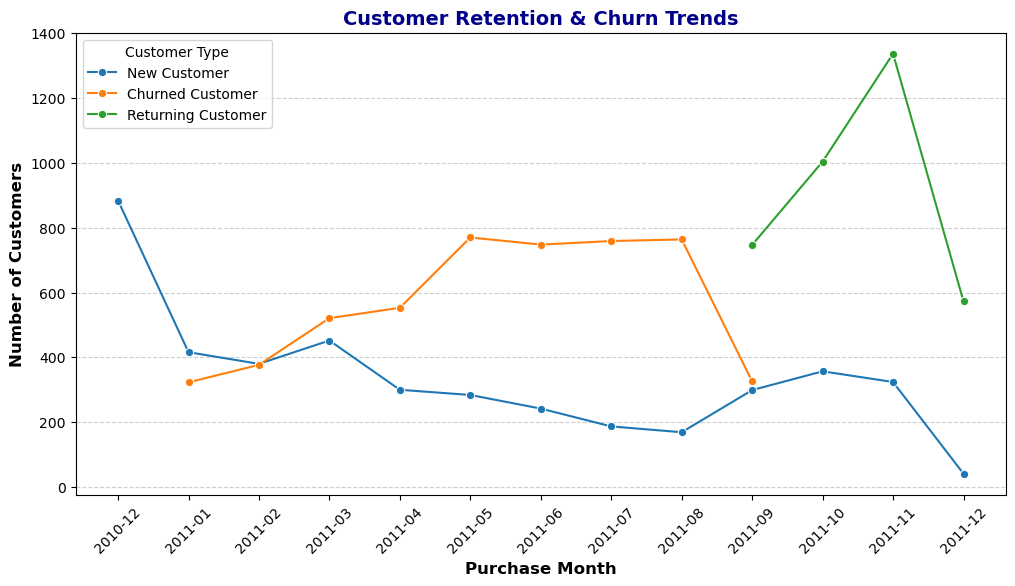

In [229]:
plt.figure(figsize=(12, 6))

# Line plot of customer trends over time
sns.lineplot(data=customer_trends, x='PurchaseMonth', y='CustomerCount', hue='CustomerType', marker='o')

# Formatting
plt.xticks(rotation=45)
plt.xlabel('Purchase Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')
plt.title('Customer Retention & Churn Trends', fontsize=14, fontweight='bold', color='darkblue')
plt.legend(title='Customer Type')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


In [231]:
df_new.to_csv("df_customertype.csv", index=False)